# Image Processing Assignment (EG/2020/3922)

## 1. Import Required Libraries
Import necessary libraries such as numpy, matplotlib, and OpenCV (cv2) for image processing.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from typing import Tuple
import ipywidgets as widgets
from IPython.display import display
import os

def show_image(img, title="Image", cmap_type='gray'):
    plt.figure(figsize=(5,5))
    if len(img.shape) == 2:
        plt.imshow(img, cmap=cmap_type)
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Ensure output directories exist
os.makedirs('outputs/mean_filter', exist_ok=True)
os.makedirs('outputs/rotation', exist_ok=True)
os.makedirs('outputs/blockwise', exist_ok=True)
os.makedirs('outputs/intensity', exist_ok=True)

## 2. Load and Display the Image

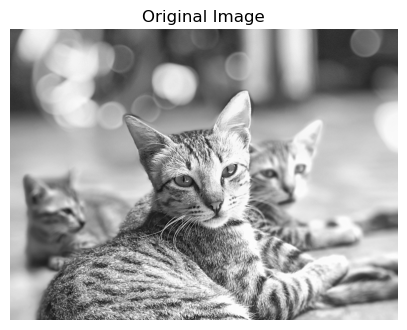

In [10]:
image_path = 'Cat.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    print(f"Image not found at {image_path}. Please check the path.")
else:
    show_image(img, title="Original Image")

## 3. Reduce Number of Intensity Levels

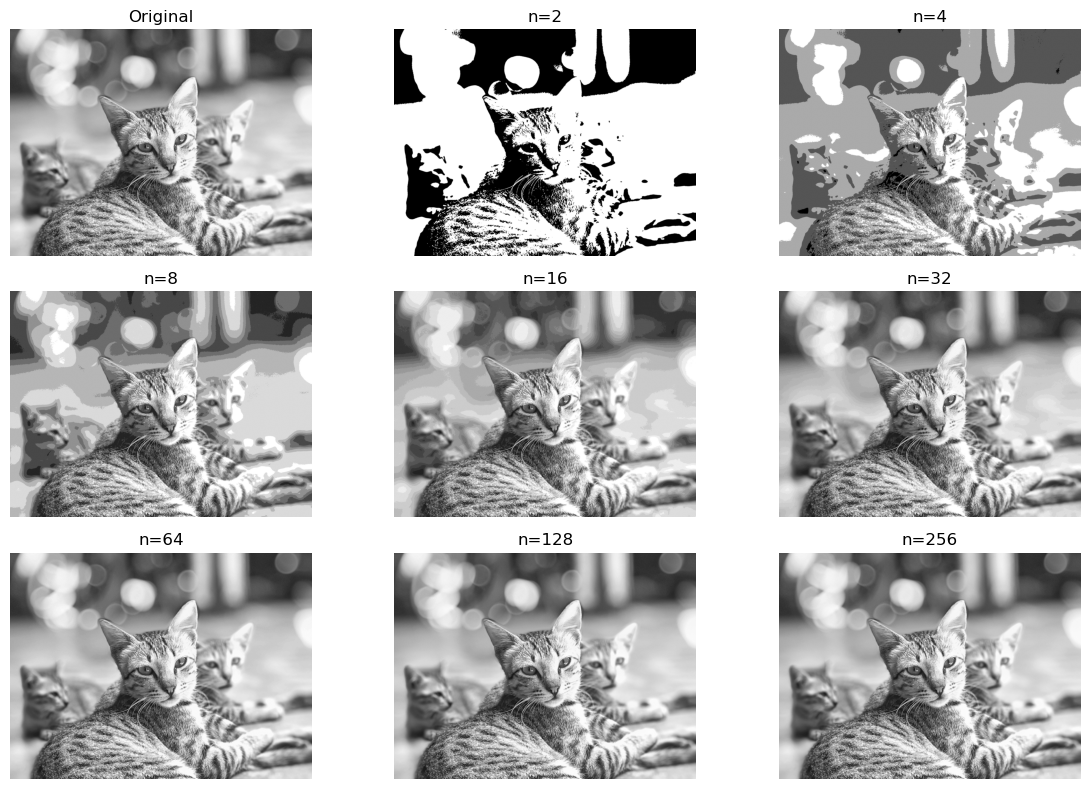

In [16]:
def reduce_intensity_levels(image, n):
    """Reduce image intensity levels to n levels (power of 2)."""
    img_float = image.astype(np.float32) / 255.0
    idx = np.round(img_float * (n - 1)).astype(np.int32)
    reduced = (idx * 255.0 / (n - 1)).astype(np.uint8)
    return reduced

n_values = [2, 4, 8, 16, 32, 64, 128, 256]
plt.figure(figsize=(12, 8))
plt.subplot(3, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

for i, n in enumerate(n_values, 2):
    reduced = reduce_intensity_levels(img, n)
    plt.subplot(3, 3, i)
    plt.imshow(reduced, cmap='gray')
    plt.title(f'n={n}')
    plt.axis('off')
    cv2.imwrite(f'outputs/intensity/reduced_{n}.png', reduced)

plt.tight_layout()
plt.show()

## 4. Spatial Averaging with 3x3, 10x10, and 20x20 Neighborhoods

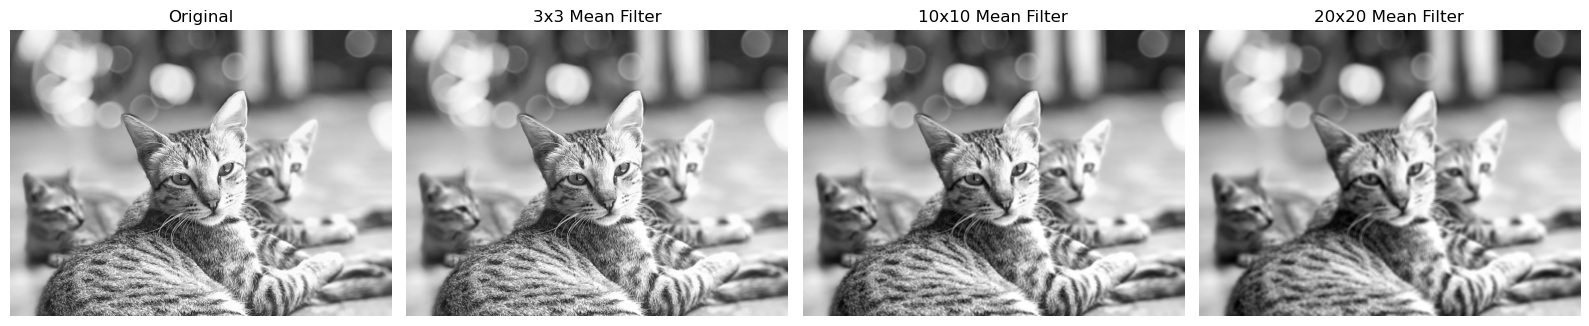

In [12]:
if img is not None:
    fig, axes = plt.subplots(1, 4, figsize=(16, 5))
    axes[0].imshow(img, cmap='gray')
    axes[0].set_title('Original')
    axes[0].axis('off')
    for idx, k in enumerate([3, 10, 20], 1):
        blurred = cv2.blur(img, (k, k))
        axes[idx].imshow(blurred, cmap='gray')
        axes[idx].set_title(f'{k}x{k} Mean Filter')
        axes[idx].axis('off')
        cv2.imwrite(f'outputs/mean_filter/mean_filter_{k}x{k}.png', blurred)
    plt.tight_layout()
    plt.show()

## 5. Rotate Image by 45 and 90 Degrees
Rotate the image by 45 and 90 degrees using OpenCV and display the results.

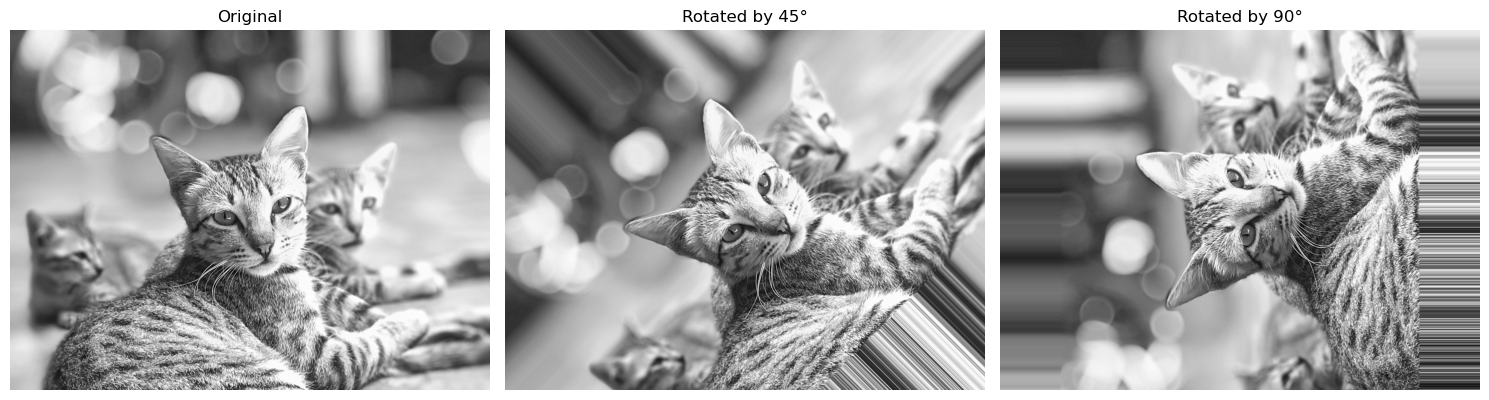

In [13]:
def rotate_image(image: np.ndarray, angle: float) -> np.ndarray:
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REPLICATE)
    return rotated

if img is not None:
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(img, cmap='gray')
    axes[0].set_title('Original')
    axes[0].axis('off')
    for idx, angle in enumerate([45, 90], 1):
        rotated_img = rotate_image(img, angle)
        axes[idx].imshow(rotated_img, cmap='gray')
        axes[idx].set_title(f'Rotated by {angle}°')
        axes[idx].axis('off')
        cv2.imwrite(f'outputs/rotation/rotated_{angle}.png', rotated_img)
    plt.tight_layout()
    plt.show()

## 6. Block-wise Averaging for Spatial Resolution Reduction (3x3, 5x5, 7x7 Blocks)

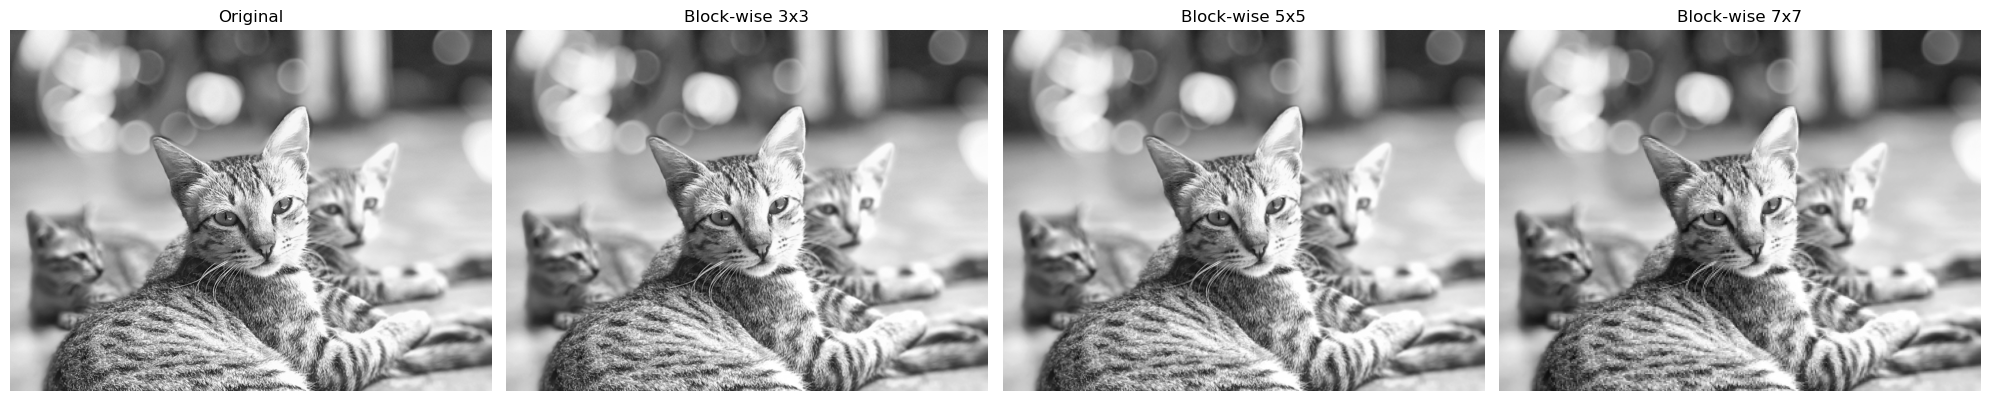

In [14]:
def blockwise_average(image: np.ndarray, block_size: int) -> np.ndarray:
    h, w = image.shape
    out = image.copy().astype(np.float32)
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = image[i:i+block_size, j:j+block_size]
            avg = np.mean(block, dtype=np.float32)
            out[i:i+block_size, j:j+block_size] = avg
    return np.clip(out, 0, 255).astype(np.uint8)

if img is not None:
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes[0].imshow(img, cmap='gray')
    axes[0].set_title('Original')
    axes[0].axis('off')
    for idx, block_size in enumerate([3, 5, 7], 1):
        block_img = blockwise_average(img, block_size)
        axes[idx].imshow(block_img, cmap='gray')
        axes[idx].set_title(f'Block-wise {block_size}x{block_size}')
        axes[idx].axis('off')
        cv2.imwrite(f'outputs/blockwise/blockwise_{block_size}x{block_size}.png', block_img)
    plt.tight_layout()
    plt.show()